## 1、项目介绍

火力发电的基本原理是：燃料在燃烧时加热水生成蒸汽，蒸汽压力推动汽轮机旋转，然后汽轮机带动发电机旋转，产生电能。在这一系列的能量转化中，影响发电效率的核心是锅炉的燃烧效率，即燃料燃烧加热水产生高温高压蒸汽。锅炉的燃烧效率的影响因素很多，包括锅炉的可调参数，如燃烧给量，一二次风，引风，返料风，给水水量；以及锅炉的工况，比如锅炉床温、床压，炉膛温度、压力，过热器的温度等。

In [1]:
#导入数据探索包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")


In [2]:
train_data_file="./data/zhengqi_train.txt"
test_data_file="./data/zhengqi_test.txt"

train_data=pd.read_csv(train_data_file,sep='\t')
test_data=pd.read_csv(test_data_file,sep='\t')

In [3]:
train_data.info()
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
train_data.describe(include='all')

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [5]:

train_data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


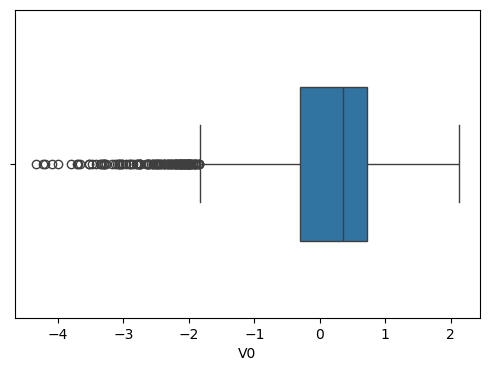

In [6]:
fig = plt.figure(figsize=(6, 4)) # 创建一个新的 figure 对象 (画布)，并设置 figure 的大小为宽度 6 英寸，高度 4 英寸。 figsize 控制绘图的整体尺寸。
sns.boxplot(x=train_data['V0'], orient="v", width=0.5) # 使用 seaborn 的 boxplot 函数绘制箱线图。
                                                        # x=train_data['V0']:  指定要绘制箱线图的数据是 train_data DataFrame 中 'V0' 列的数据。这列数据将作为箱线图的数值轴。
                                                        # orient="v":          指定箱线图的方向为垂直 (vertical)。如果设置为 "h"，则为水平方向。
                                                        # width=0.5:           设置箱线图的箱体宽度为 0.5。可以调整此值以控制箱体的粗细。
plt.show()

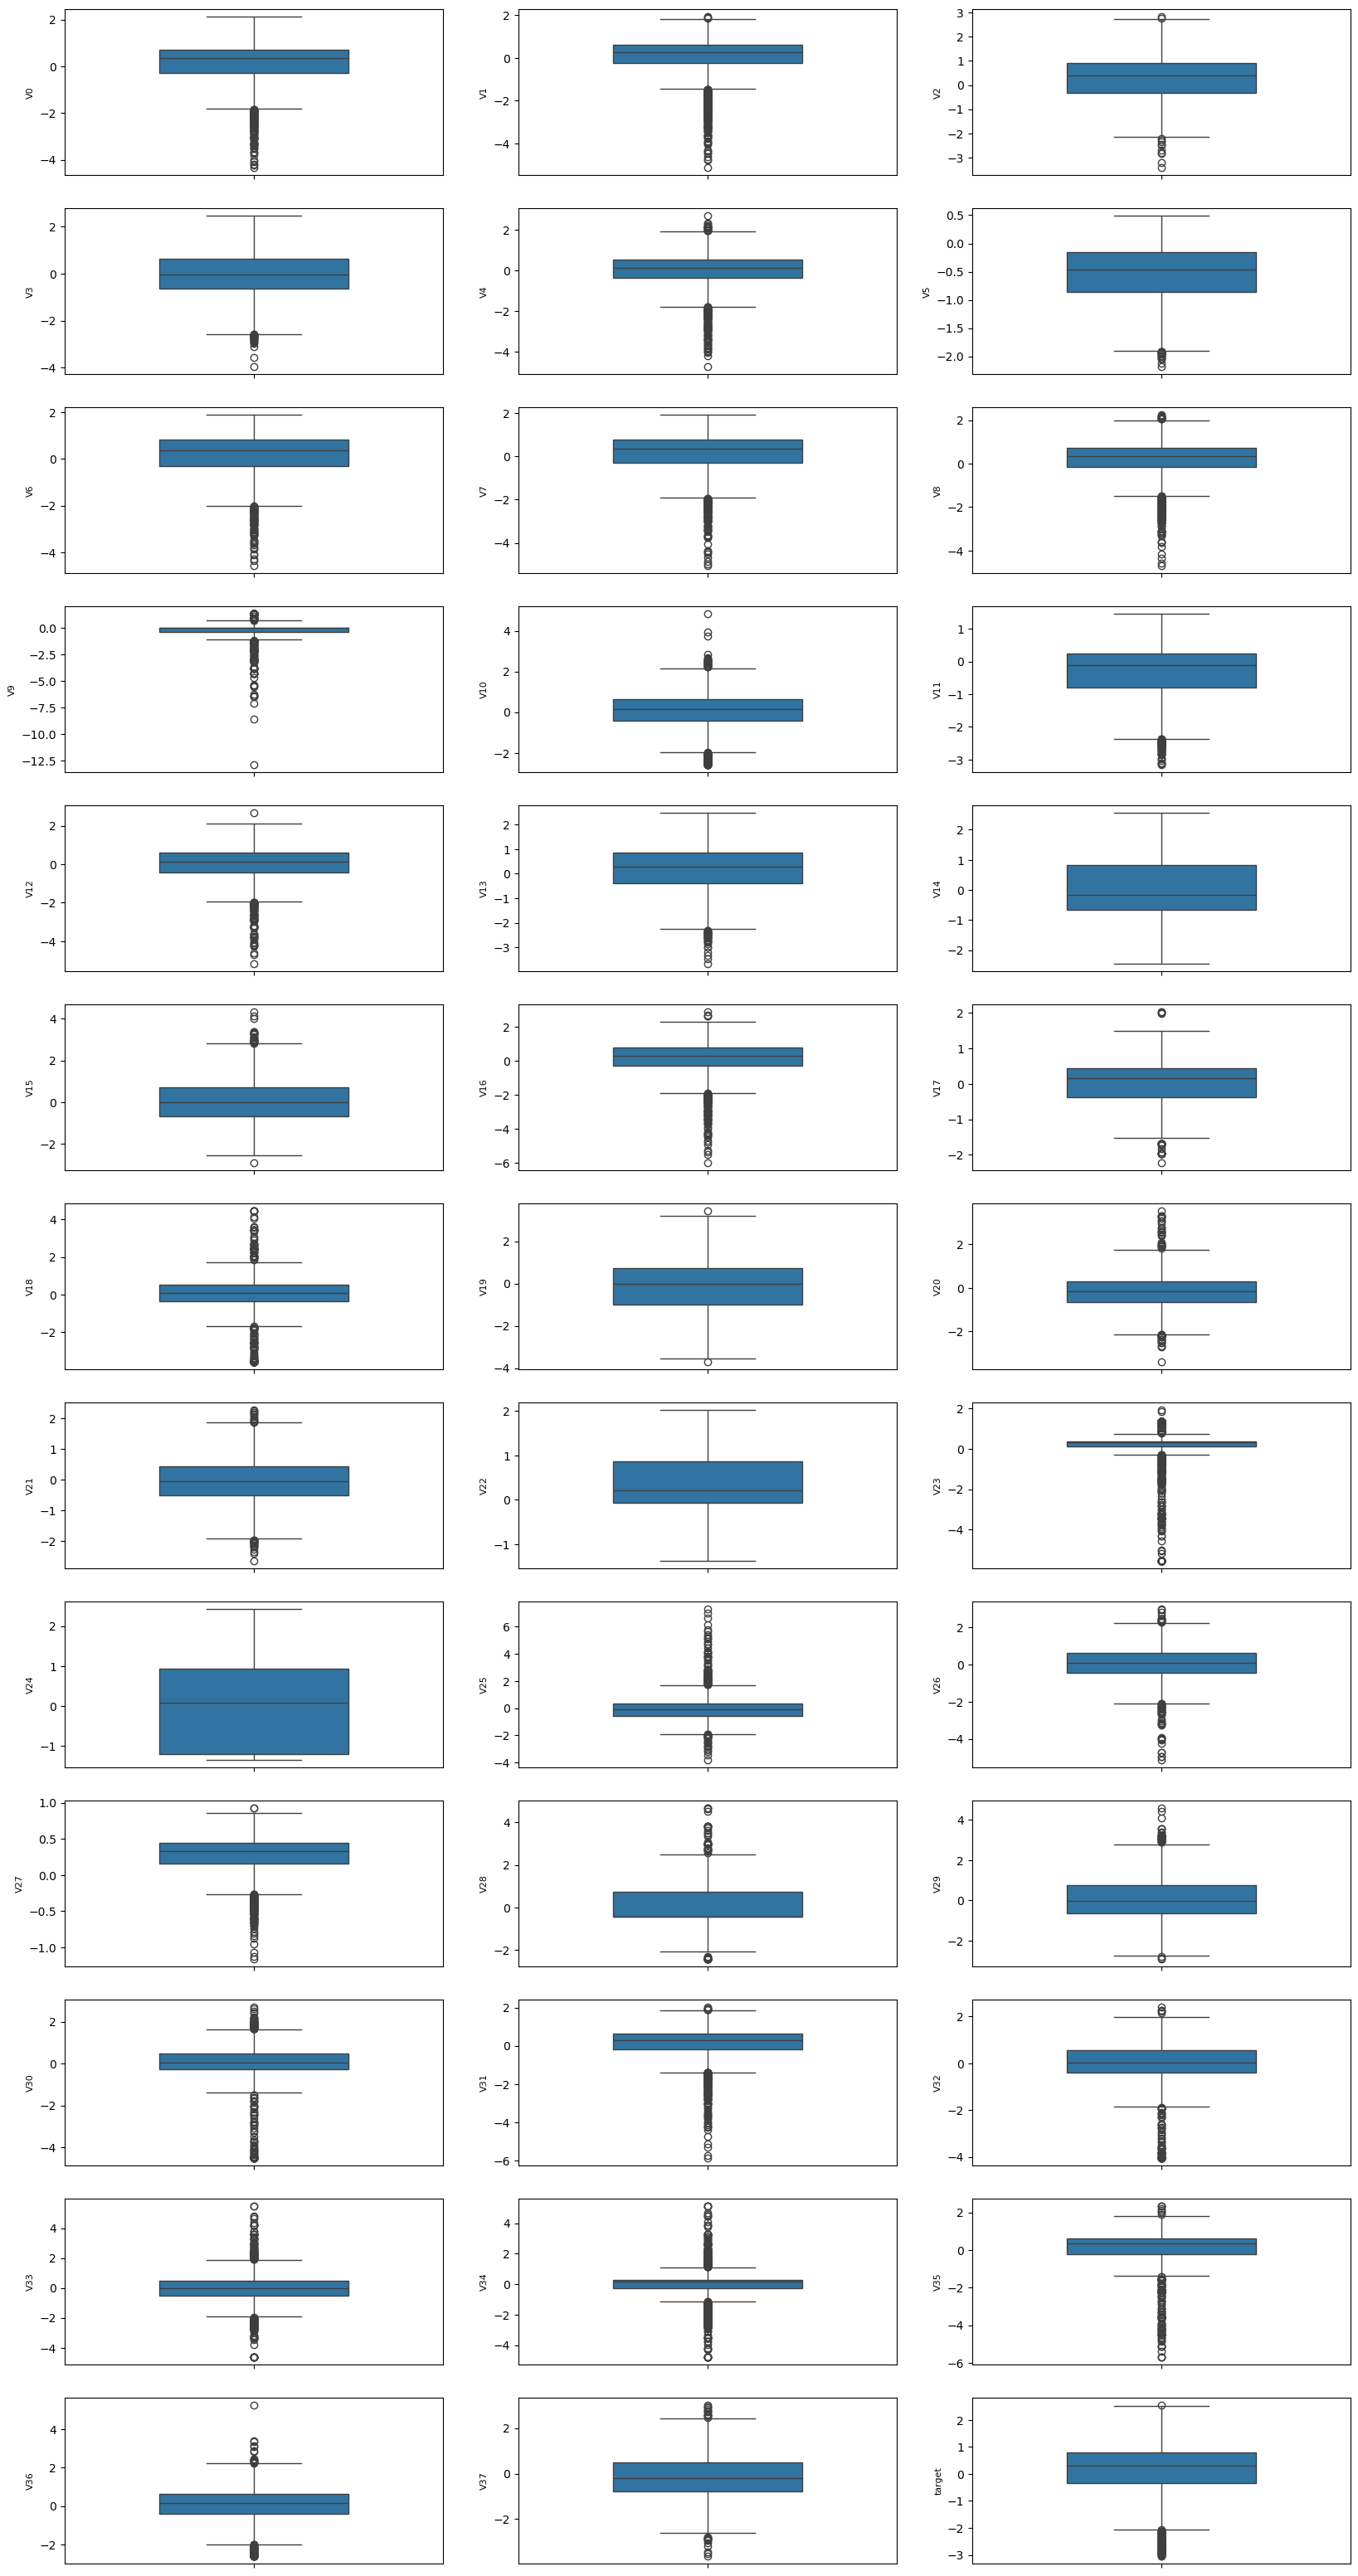

In [7]:

column = train_data.columns.tolist()[:39] # 获取 train_data 的所有列名，并转换为 Python 列表。然后取列表的前 39 个元素（索引 0 到 38），赋值给变量 column。
                                        # 这样做是为了选择前 39 列进行箱线图绘制 .
fig = plt.figure(figsize=(20, 40)) # 创建一个新的 figure 对象 (画布)，并设置 figure 的大小为宽度 20 英寸，高度 40 英寸。
                                   # figsize 设置较大的尺寸是为了容纳多个子图，防止子图之间重叠。
for i in range(39): # 使用 for 循环遍历前 39 个列的索引 (从 0 到 39)。
    plt.subplot(13, 3, i + 1) # 创建子图。
                                 # 13, 3:  将 figure 分割成 13 行 3 列的网格。总共可以创建 13 * 3 = 39 个子图。
                                 # i + 1:  指定当前子图的位置。子图的编号从 1 开始，按行优先从左到右递增。
                                 #          例如，i=0 时，创建的是第 1 个子图；i=1 时，创建的是第 2 个子图，以此类推。
    sns.boxplot(train_data[column[i]], orient="v", width=0.5) # 使用 seaborn 的 boxplot 函数绘制箱线图。
                                                              # train_data[column[i]]:  选取 train_data DataFrame 中 column 列表中索引为 i 的列。
                                                              #                           在循环的每次迭代中，column[i] 会依次取出 column 列表中的列名，
                                                              #                           从而绘制不同列的箱线图。
                                                              # orient="v":          指定箱线图的方向为垂直 (vertical)。
                                                              # width=0.5:           设置箱线图的箱体宽度为 0.5。
    plt.ylabel(column[i], fontsize=8) # 设置当前子图的 y 轴标签。
                                       # column[i]:  使用当前列名作为 y 轴标签。
                                       # fontsize=8:  设置 y 轴标签的字体大小为 8。这样做是为了在多个子图的情况下，标签不会显得过大而重叠。

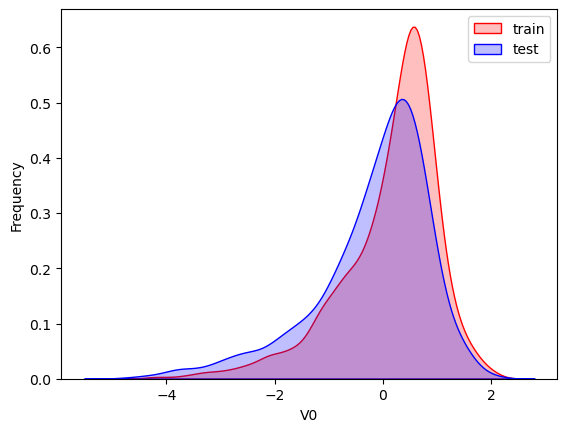

In [8]:
# 使用sns.kdeplot绘制训练数据中'V0'特征的核密度估计图，颜色设置为红色，并填充区域
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True)

# 使用sns.kdeplot绘制测试数据中'V0'特征的核密度估计图，颜色设置为蓝色，并填充区域
ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True)

# 设置x轴标签为"V0"
ax.set_xlabel("V0")

# 设置y轴标签为"Frequency"
ax.set_ylabel("Frequency")

# 添加图例，标签分别为"train"和"test"，以区分训练数据和测试数据的分布
ax = ax.legend(["train", "test"])

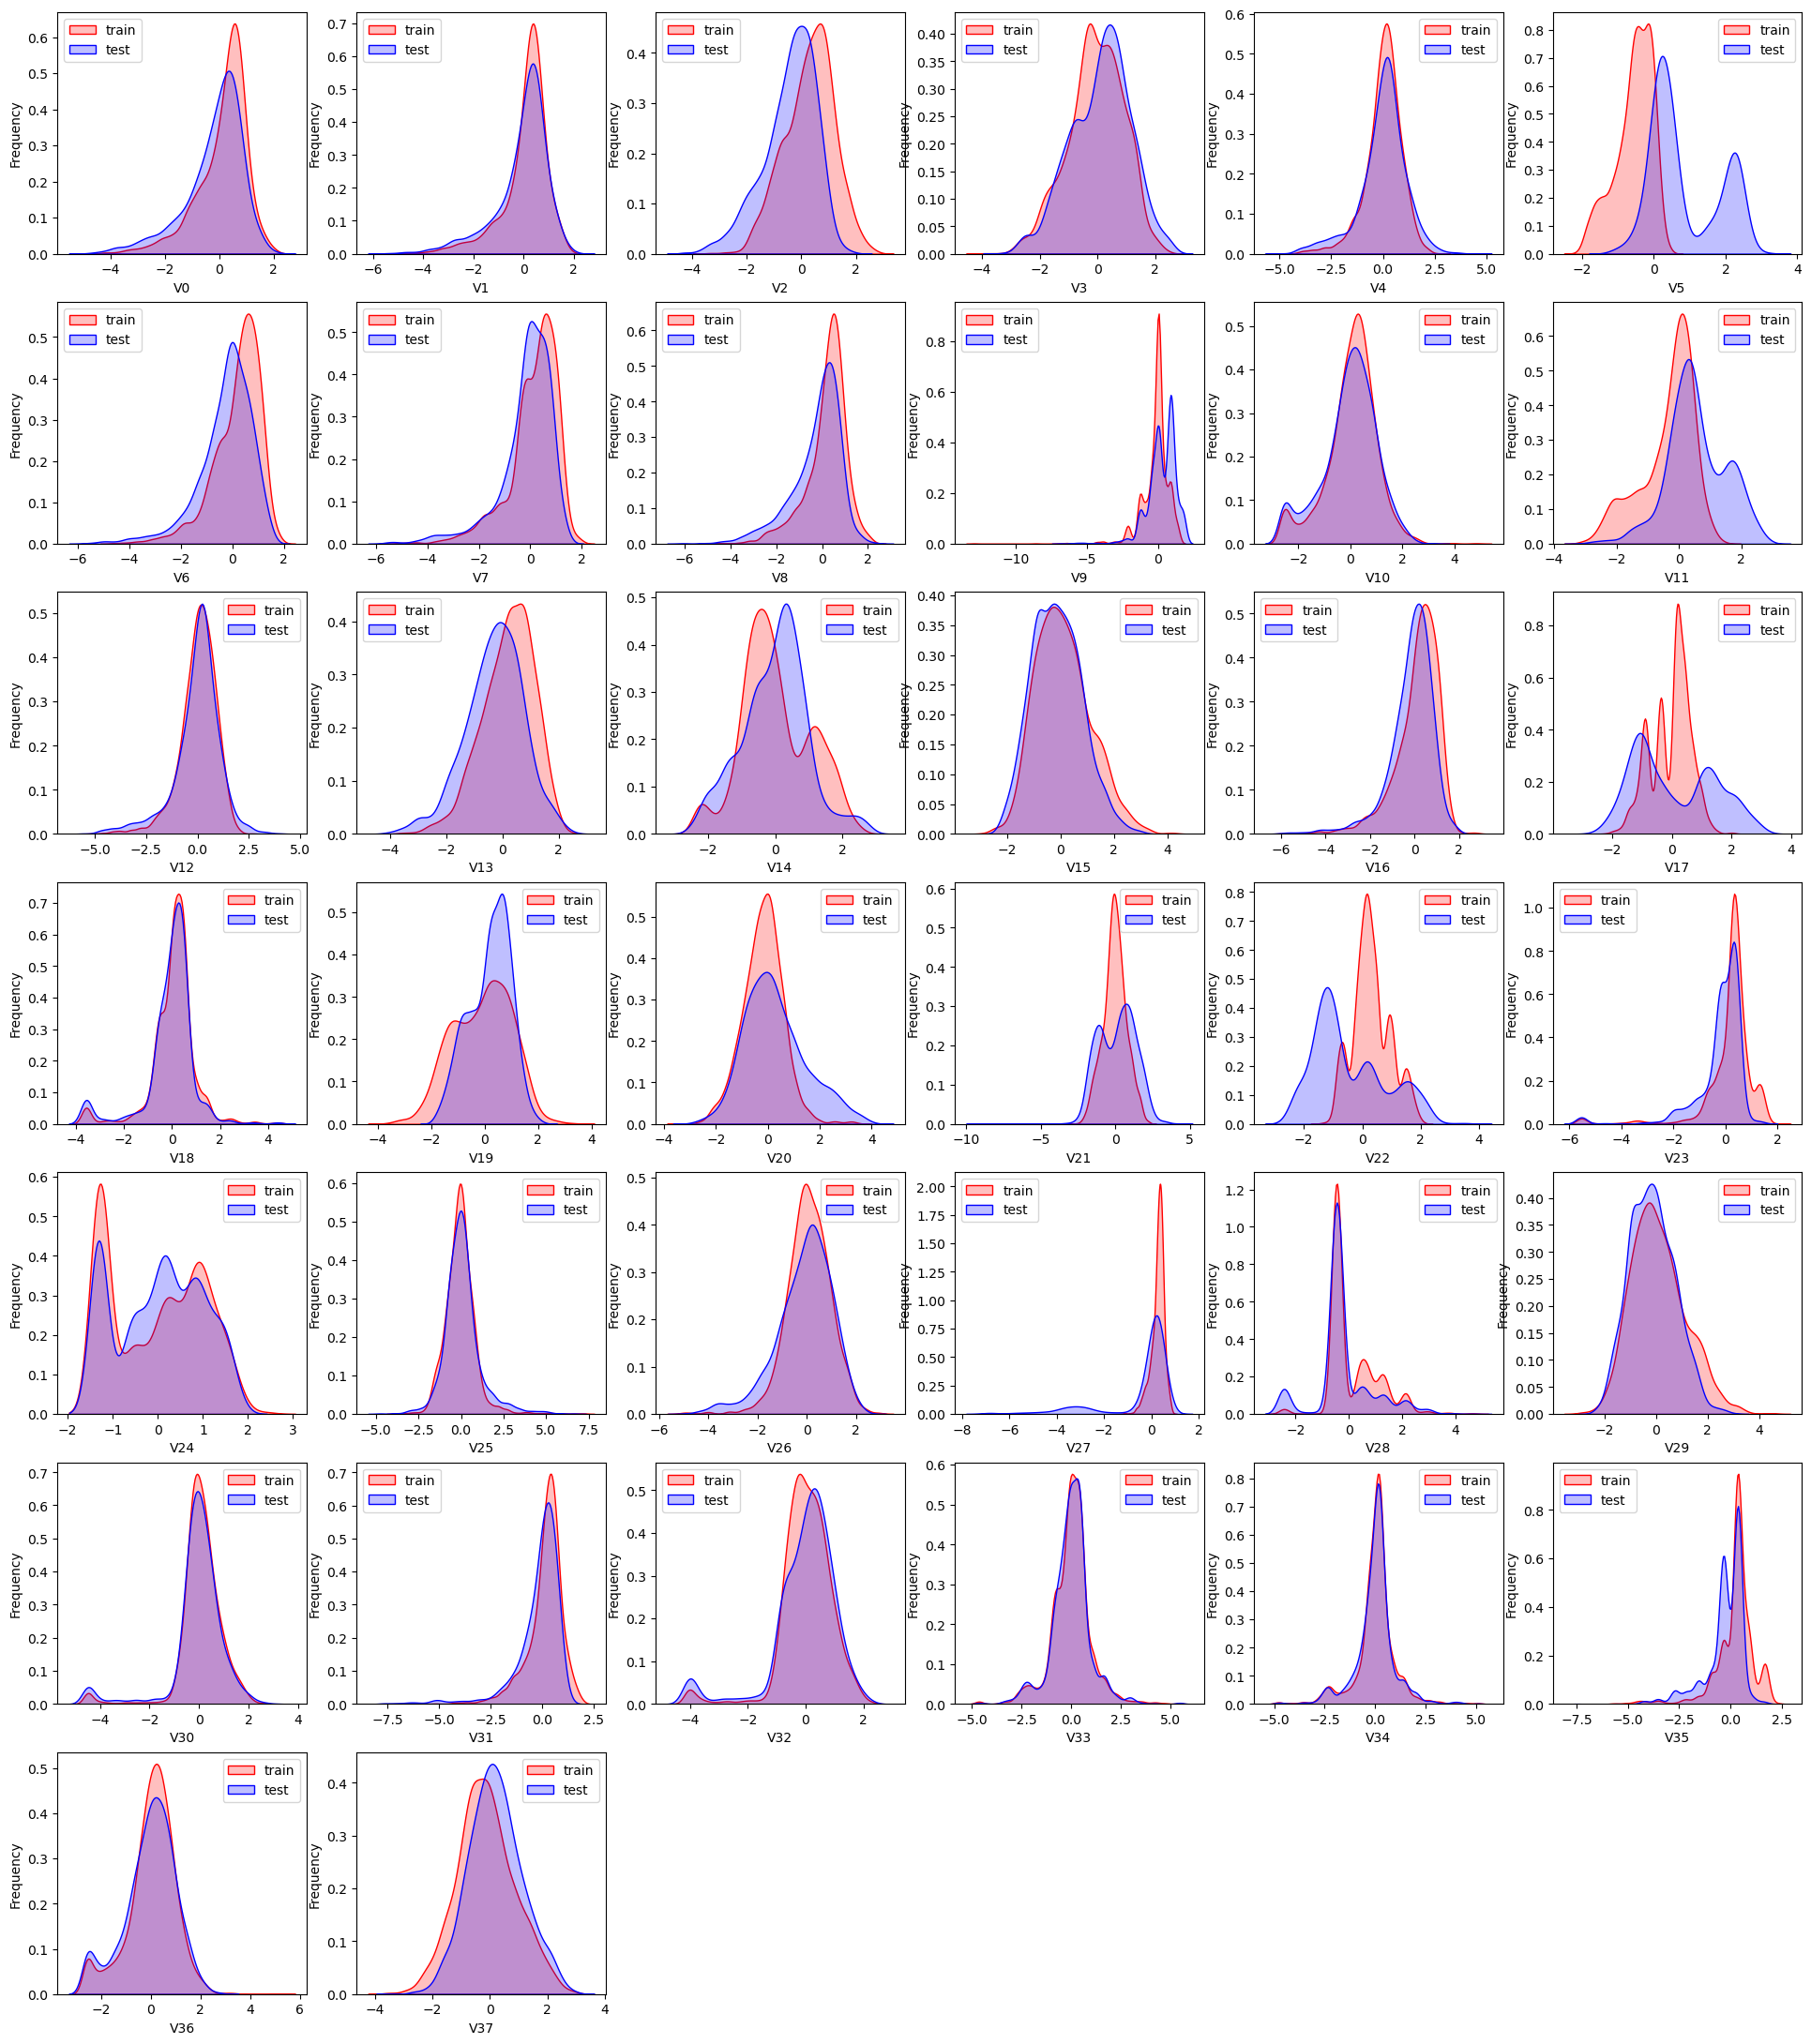

In [9]:
# 设置绘图的列数
dist_cols = 6
# 设置绘图的行数，根据测试数据的列数动态确定
dist_rows = len(test_data.columns)
# 根据行列数设置图形的大小
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))
# 初始化子图计数器
i = 1
# 遍历测试数据的每一列
for col in test_data.columns:
    # 创建子图
    ax = plt.subplot(dist_rows, dist_cols, i)
    # 绘制训练数据的核密度估计图
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    # 绘制测试数据的核密度估计图
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    # 设置x轴标签为当前列名
    ax.set_xlabel(col)
    # 设置y轴标签为频率
    ax.set_ylabel("Frequency")
    # 添加图例，区分训练和测试数据
    ax = ax.legend(["train", "test"])
    # 更新子图计数器
    i = i + 1
# 显示所有子图
plt.show()

查看特征'V5', 'V17', 'V28', 'V22', 'V11', 'V9'数据的数据分布

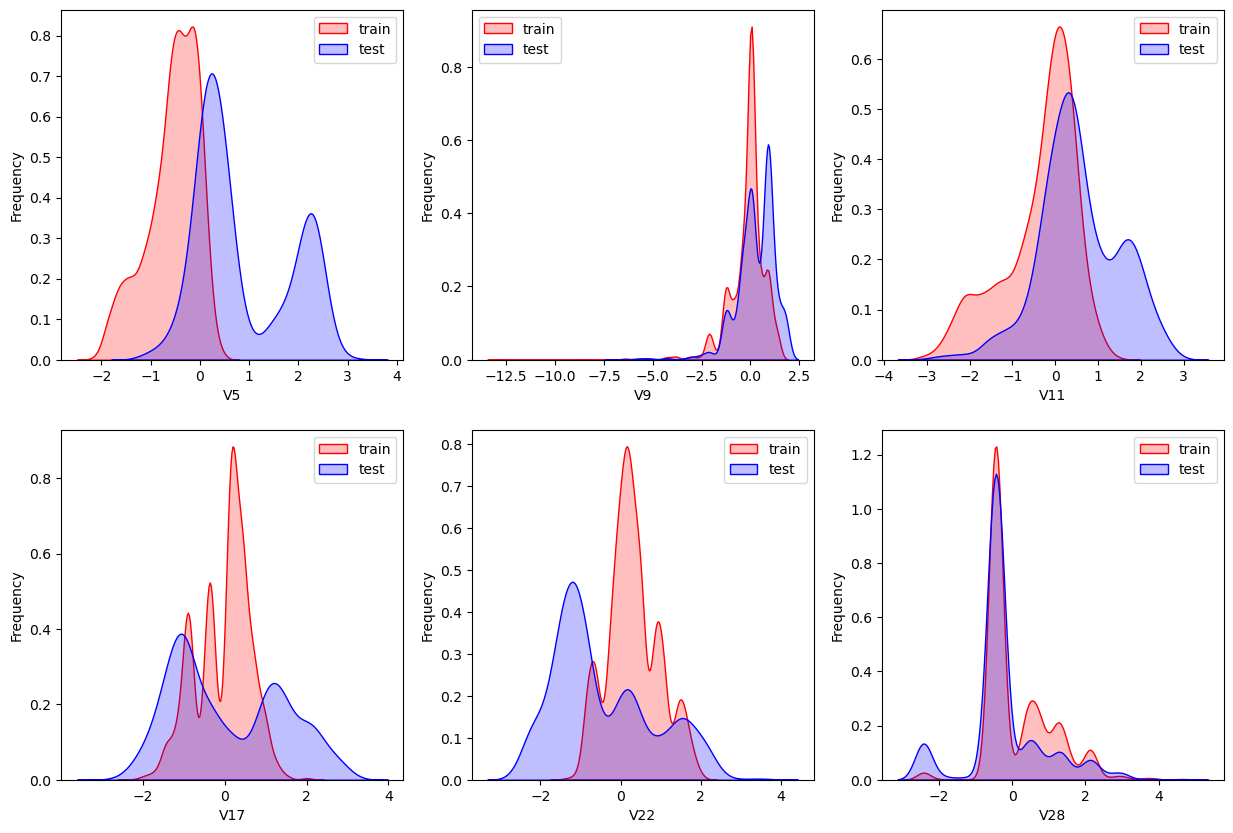

In [10]:
col=3
row=2
plt.figure(figsize=(5*col,5*row))
i=1
for c in ["V5","V9","V11","V17","V22","V28"]:
    ax=plt.subplot(row,col,i)
    ax=sns.kdeplot(train_data[c],color="Red",shade=True)
    ax=sns.kdeplot(test_data[c],color="Blue",shade=True)
    ax.set_xlabel(c)
    ax.set_ylabel("Frequency")
    ax=ax.legend(["train","test"])
    i+=1

特征变量相关性

In [11]:
drop_col_kde=["V5","V9","V11","V17","V22","V28"]
train_data_drop=train_data.drop(drop_col_kde,axis=1)
train_corr=train_data_drop.corr()
train_corr

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,0.189267,0.141294,0.794013,0.298443,0.751830,...,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,0.276805,0.205023,0.874650,0.310120,0.656186,...,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,0.615938,0.477114,0.703431,0.346006,0.059941,...,-0.275764,0.175943,0.653764,0.033942,0.050309,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,0.233896,0.197836,0.411946,0.321262,0.306397,...,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,-0.117529,-0.052370,0.449542,0.141129,0.927685,...,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.100010,0.113609,-0.031054,0.603984
V6,0.189267,0.276805,0.615938,0.233896,-0.117529,1.000000,0.917502,0.468233,0.415660,-0.087312,...,-0.467980,0.188907,0.546535,0.144550,0.054210,-0.002914,0.044992,0.433804,-0.404817,0.370037
V7,0.141294,0.205023,0.477114,0.197836,-0.052370,0.917502,1.000000,0.389987,0.310982,-0.036791,...,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.111166,0.340479,-0.292285,0.287815
V8,0.794013,0.874650,0.703431,0.411946,0.449542,0.468233,0.389987,1.000000,0.419703,0.420557,...,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.179167,0.326586,-0.553121,0.831904
V10,0.298443,0.310120,0.346006,0.321262,0.141129,0.415660,0.310982,0.419703,1.000000,0.140462,...,-0.105042,-0.036705,0.560213,-0.093213,0.016739,-0.026994,0.026846,0.922190,-0.045851,0.394767
V12,0.751830,0.656186,0.059941,0.306397,0.927685,-0.087312,-0.036791,0.420557,0.140462,1.000000,...,0.666775,0.028866,0.441963,-0.007658,0.046674,0.010122,0.081963,0.112150,-0.054827,0.594189


绘制热力图

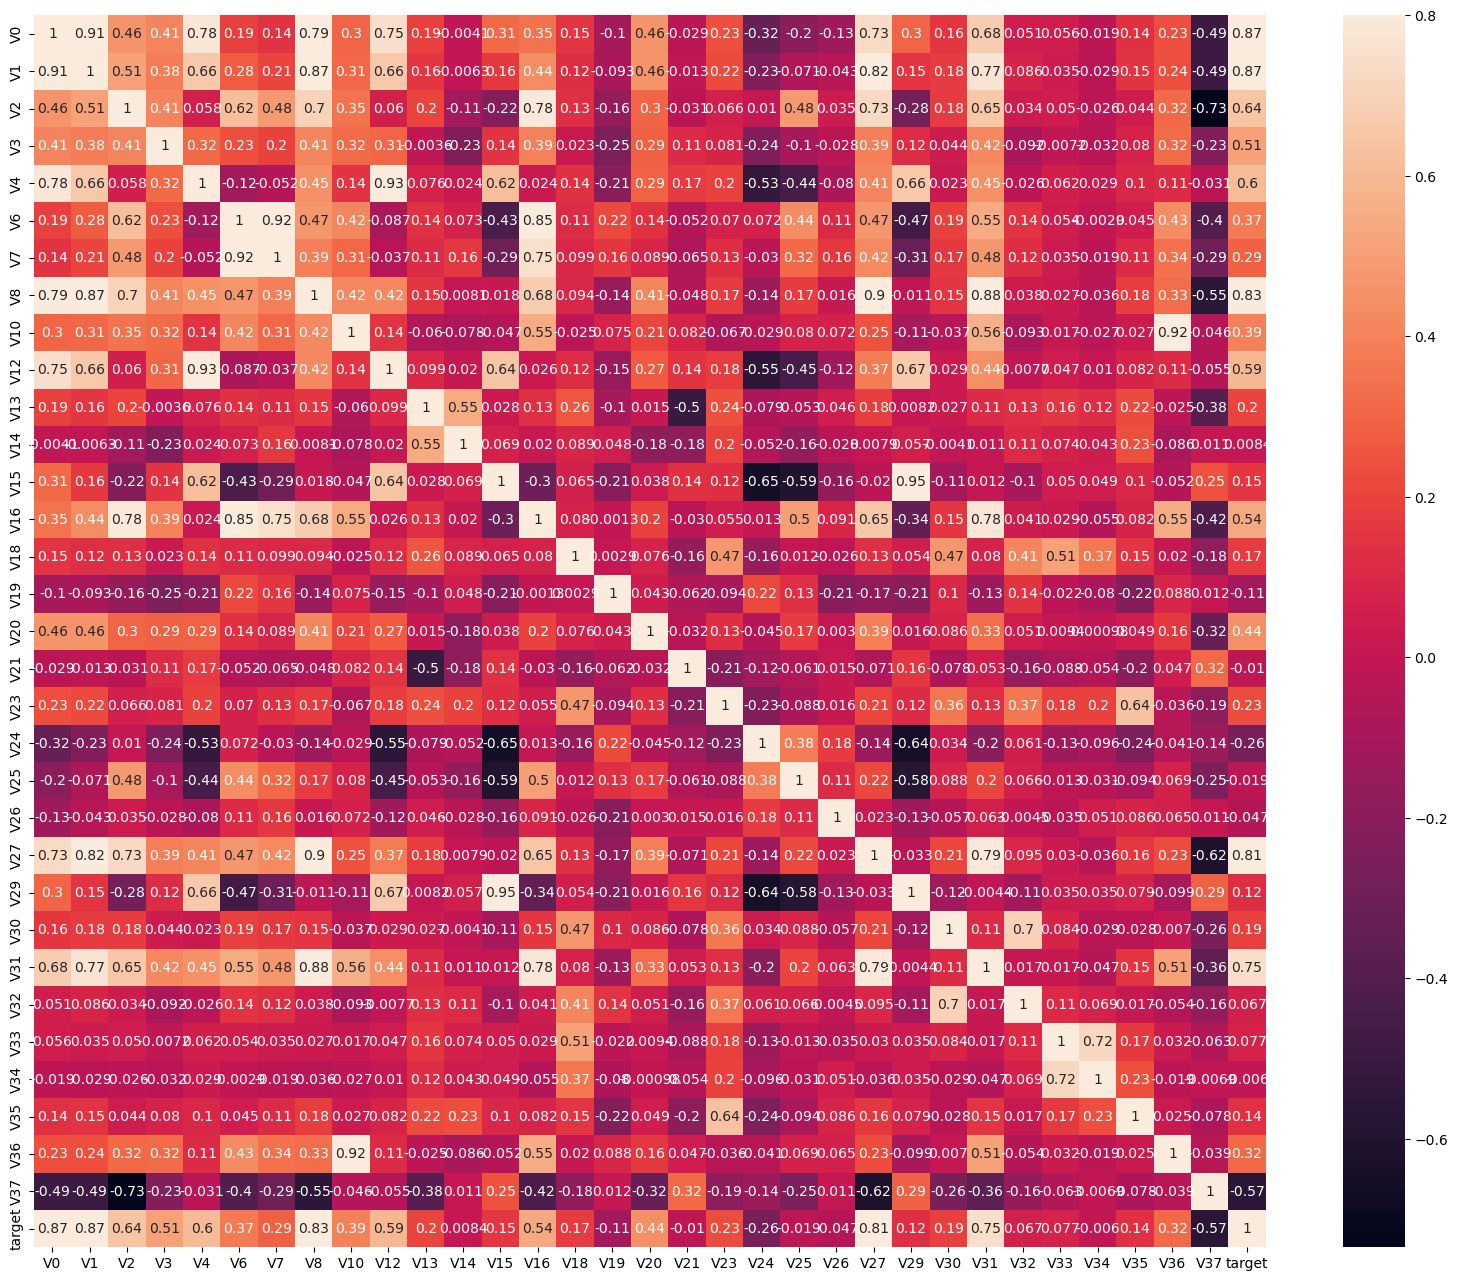

In [12]:
ax=plt.subplots(figsize=(20,16))
ax=sns.heatmap(train_corr,vmax=.8,square=True,annot=True)

绘制半热力图

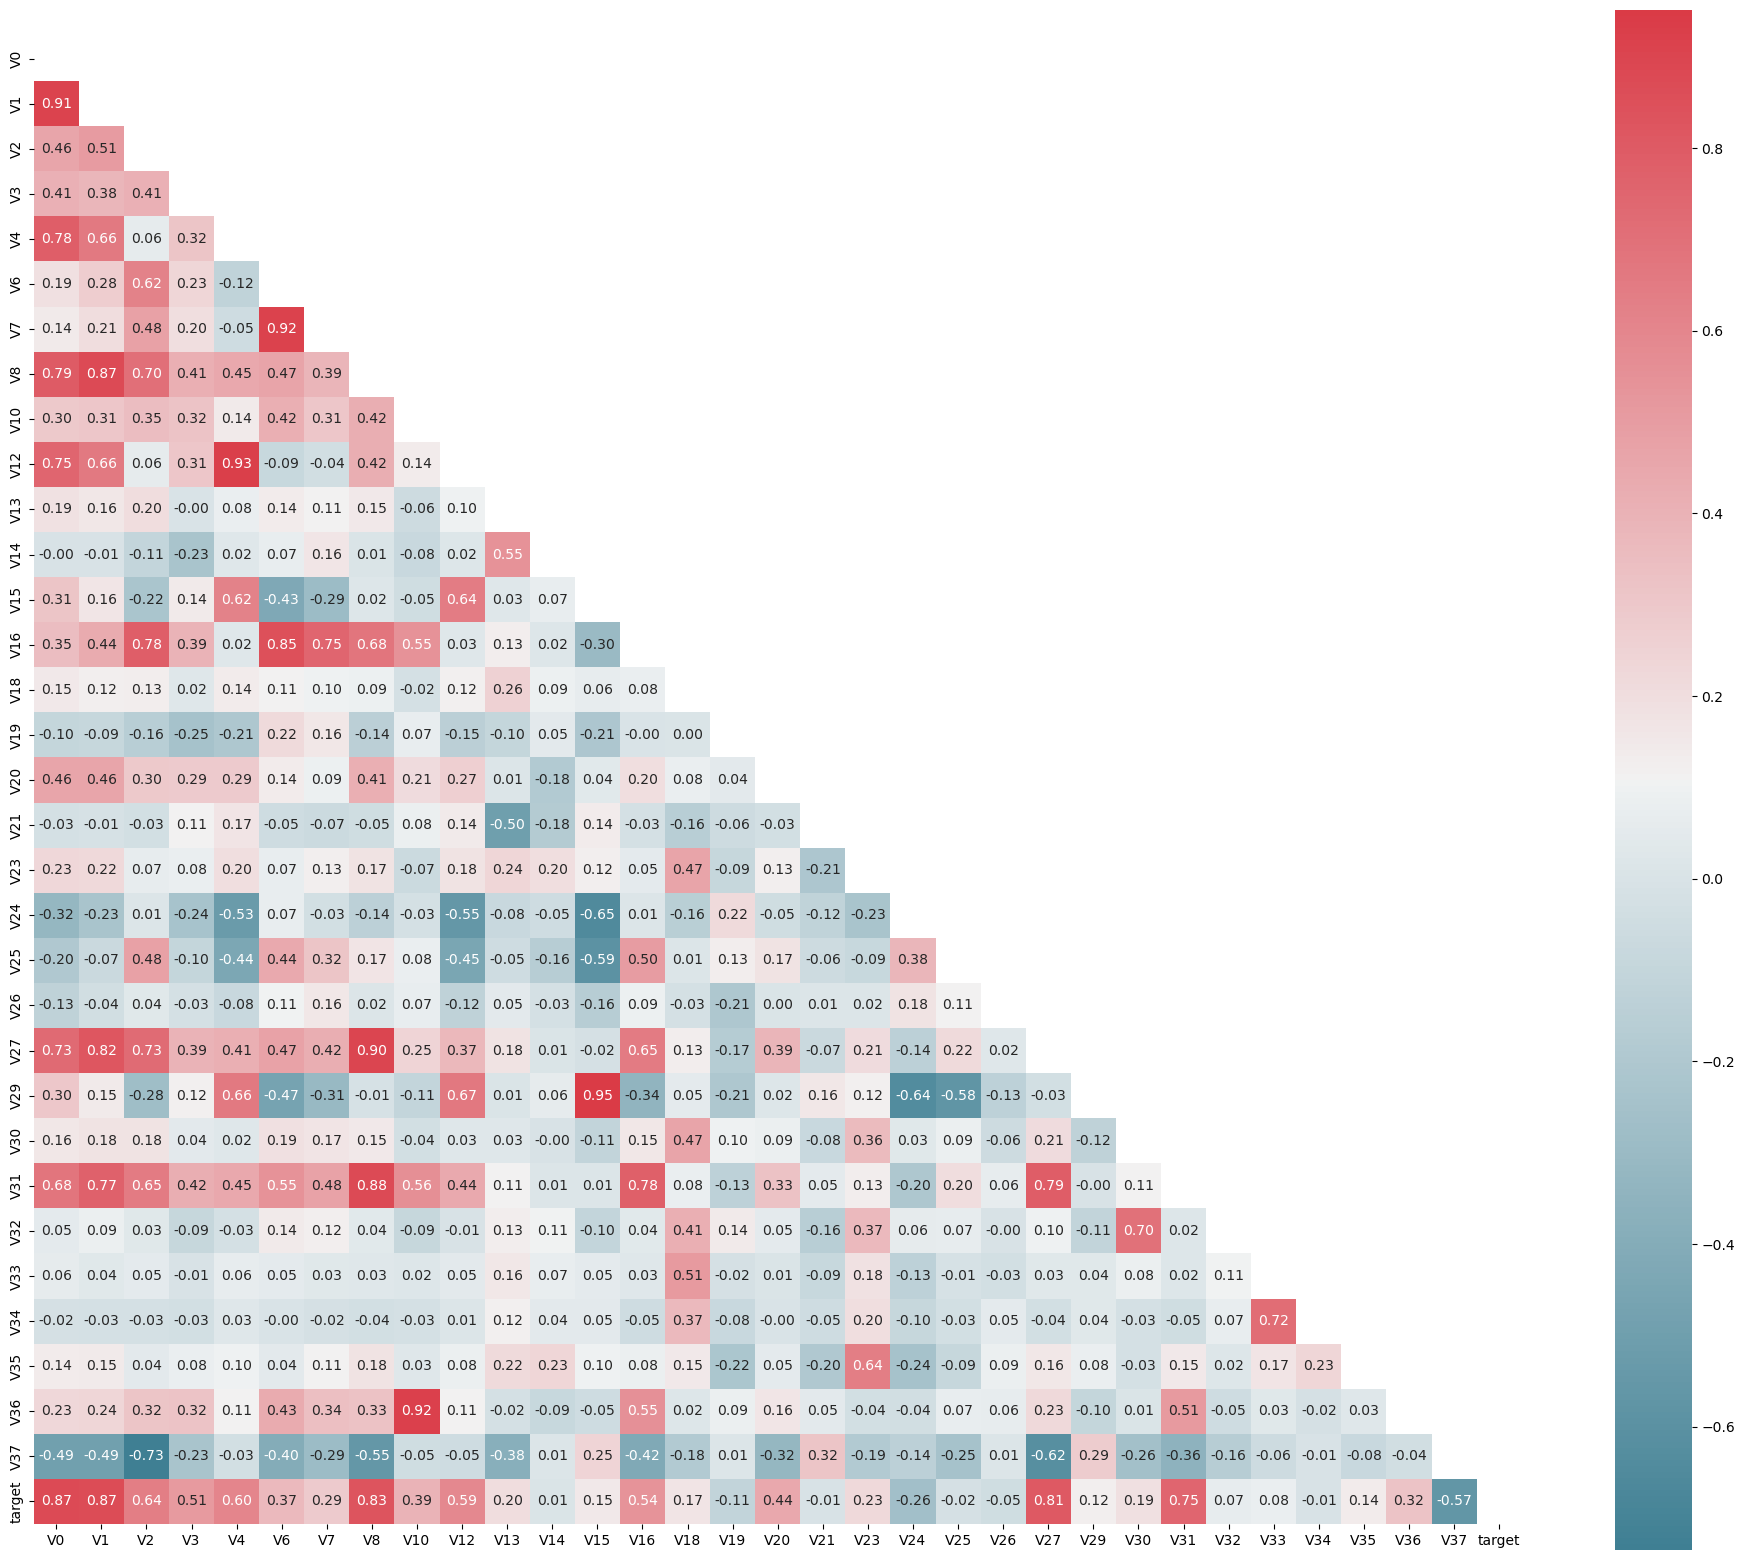

In [ ]:
# 创建指定大小的画布，用于后续绘制热力图
plt.figure(figsize=(24,20))

# 计算训练数据（去除缺失值后的数据集）的相关系数矩阵
mcorr=train_data_drop.corr()

# 创建上三角掩码数组，用于隐藏热力图的上三角部分重复信息
mask=np.zeros_like(mcorr,dtype=np.bool_) #同等形状的bool数组
mask[np.triu_indices_from(mask)]=True #上三角数组设为true

# 定义发散式配色方案，生成颜色映射对象
cmap=sns.diverging_palette(220,10,as_cmap=True)

# 绘制相关系数热力图，参数说明：
# mask：应用上三角掩码隐藏重复区域
# cmap：使用定义的颜色映射
# square：强制单元格为正方形
# annot：显示数值标签
# fmt：数值格式化为两位小数
g=sns.heatmap(mcorr,mask=mask,cmap=cmap,square=True,annot=True,fmt="0.2f")